This is a tutorial for using [ODT Flow Explorer](http://gis.cas.sc.edu/GeoAnalytics/od.html). The API reference is in [here](https://github.com/GIBDUSC/ODT_Flows/wiki/ODT-Flow-REST-APIs). Each API performs a specific task such as aggregate the flows for a selected place and download flow data for an interested geographic area. All APIs return data in CSV (comma-separated values) format. The API is specified in the **operation** parameter in the API query(see examples below).

# Import packages

Please install packages before importing. This toturial is tested in Windows 10 and Ubuntu 18.04 using Chrome browser.

In [1]:
import os
import pandas as pd
import numpy as np
import requests
from io import StringIO
# import gdal
import keplergl
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Query Examples

These examples show how to use API to obtain data in Jupyternotebook.

## get_flow_by_place

Return the aggregated movement between the selected place and other places. (Corresponding to the Choropleth Map function in the Explorer).

In [2]:
target_place = 54   

params = {"operation": "get_flow_by_place",
       "source": "twitter",
       "scale": "us_state",
        "place": str(target_place),
       "begin": "01/01/2020",
       "end": "12/31/2020",
       "direction": "both"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

df = pd.read_csv(StringIO(r.text), header=None, names=["place", "count"])
df

,place,count
0,Georgia,370
1,Virginia,5147
2,Wyoming,5
3,Kansas,95
4,Tennessee,787
5,Ohio,8838
6,South Carolina,474
7,Missouri,197
8,Indiana,376
9,South Dakota,13


## get_daily_movement_by_place

Return the daily inter-unit movements between the selected place and other places or the selected place's daily intra-unit movements. (Corresponding to the Daily Movements function in the Explorer).

In [719]:
target_place = 32003   # Clark County, NV, Las Vegas city

params = {"operation": "get_daily_movement_by_place",
          "scale": "us_county",
       "source": "safegraph",
        "place": str(target_place),
          "begin": "01/01/2020",
          "end": "12/31/2020",
       "direction": "inflow"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)
df = pd.read_csv(StringIO(r.text), header=None, names=["date", "count"])
df

,date,count
0,2020-01-01,67010
1,2020-01-02,63624
2,2020-01-03,61241
3,2020-01-04,58069
4,2020-01-05,47221
...,...,...
361,2020-12-27,37283
362,2020-12-28,34454
363,2020-12-29,33722
364,2020-12-30,36466


## get_daily_movement_for_all_places


In [723]:
target_place = 32003   # Clark County, NV, Las Vegas city

params = {"operation": "get_daily_movement_for_all_places",
          "scale": "us_state",
       "source": "twitter",
        "place": str(target_place),
          "begin": "01/01/2020",
          "end": "12/31/2020"
         }

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)
df = pd.read_csv(StringIO(r.text))
df

,place,date,intra_movement
0,Alabama,2020-01-01,855
1,Alabama,2020-01-02,867
2,Alabama,2020-01-03,968
3,Alabama,2020-01-04,845
4,Alabama,2020-01-05,834
...,...,...,...
17537,Wyoming,2020-12-26,9
17538,Wyoming,2020-12-27,13
17539,Wyoming,2020-12-28,18
17540,Wyoming,2020-12-29,17


## extract_odt_data

Return the selected OD flows in either temporally aggregated format or daily format.

In [726]:
params = {"operation": "extract_odt_data",
       "source": "twitter",
        "scale": "us_county",
       "begin": "04/01/2019" ,
       "end": "04/02/2019",
       "bbox": "-90,90,-180,180",
       "type": "daily"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

df = pd.read_csv(StringIO(r.text))
df

,o_place,d_place,year,month,day,cnt,o_lat,o_lon,d_lat,d_lon
0,13121,39001,2019,4,2,1,33.740,-84.449,38.906,-83.347
1,36085,34021,2019,4,1,1,40.542,-74.207,40.301,-74.782
2,24510,51600,2019,4,2,1,39.290,-76.612,38.846,-77.306
3,42011,42035,2019,4,1,23,40.357,-75.876,41.118,-77.605
4,17075,17075,2019,4,2,2,40.777,-87.731,40.777,-87.731
...,...,...,...,...,...,...,...,...,...,...
31003,39061,18029,2019,4,2,2,39.212,-84.510,39.158,-84.866
31004,6037,24031,2019,4,1,1,33.947,-118.253,39.147,-77.074
31005,37183,37101,2019,4,1,4,35.733,-78.625,35.520,-78.378
31006,21071,21071,2019,4,1,7,37.683,-82.770,37.668,-82.766


## extract_odt_data_url

Same as od_extract_data, but returns a download URL and number of records instead of directly returning the csv data.

In [734]:
params = {"operation": "extract_odt_data_url",
       "source": "safegraph",
        "scale": "us_tract_sc",
       "begin": "01/01/2019" ,
       "end": "01/10/2019",
       "bbox": "20.19346,49.33148,-125.19531,-64.10156",
       "type": "aggregated"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [735]:
download_url, count = r.text.split(",")
print("download_url:", download_url)
print("count:", count)

# download the response
file_name = download_url.split('/')[-1]
print("Downloading data...")
download_resp = requests.get(download_url, allow_redirects=True)
f = open(file_name, 'w')
f.write(download_resp.text)
print("Saved data in:", os.path.join(os.getcwd(), file_name))
df = pd.read_csv(StringIO(download_resp.text))
df

download_url: http://gis.cas.sc.edu/GeoAnalytics/download/aggregated_sg_od_2019_tract_sc_01012019_01102019_1616036912990.csv
count: 701405
Saved data in: C:\Users\GPU\aggregated_sg_od_2019_tract_sc_01012019_01102019_1616036912990.csv


,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
0,45019004612,45063020506,1,32.839,-79.838,34.001,-81.121
1,45063020602,45079011404,21,33.960,-81.112,34.111,-80.959
2,13053020201,45083023202,1,32.349,-84.973,34.913,-82.147
3,45083022801,1013953400,1,35.068,-82.047,31.603,-86.815
4,45083023700,36119014607,2,34.655,-81.929,41.280,-73.878
...,...,...,...,...,...,...,...
701400,45045001900,12009071100,1,34.823,-82.336,28.666,-80.919
701401,51650011400,45083023301,1,37.024,-76.333,34.959,-82.214
701402,45055970200,37119005834,1,34.552,-80.448,35.111,-80.711
701403,45077010602,37109070201,3,34.876,-82.574,35.483,-81.230


# Case study 1: Find the most impacted Italy provinces on mobility by COVID-19

## extract data, may take 30 seconds.

Load the provinces' boundaries

<AxesSubplot:>

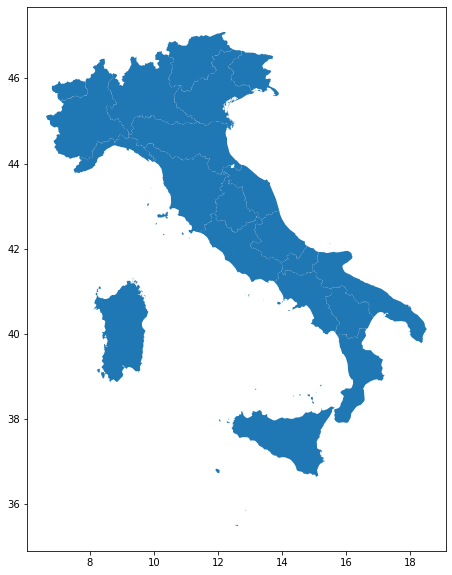

In [7]:
county_file = r'gz_2010_us_050_00_20m.json'
state_file = r'gz_2010_us_040_00_20m.json'
subdivision_file = r'gadm01_simplified/gadm36_1.shp'


gdf = gpd.read_file(subdivision_file)
# gdf.plot()

target_place = r'ITA'    

gdf_county = gdf[gdf['GID_1'].str[:3] == target_place]
gdf_county.plot(figsize=(20, 10))

In [36]:
params = {"operation": "get_daily_movement_for_all_places",
          "scale": "world_first_level_admin",
       "source": "twitter",
#         "place": str(target_place),
          "begin": "01/01/2020",
          "end": "12/31/2020"
      }

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)
df = pd.read_csv(StringIO(r.text))

df = df[df['place'].str[:3] == target_place]
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

,place,intra_movement
date,,
2020-01-01,ITA.10_1,365
2020-01-02,ITA.10_1,397
2020-01-03,ITA.10_1,381
2020-01-04,ITA.10_1,385
2020-01-05,ITA.10_1,400
...,...,...
2020-12-26,ITA.9_1,21
2020-12-27,ITA.9_1,28
2020-12-28,ITA.9_1,31


In [37]:
groupped = df.groupby([pd.Grouper(freq='M'), 'place'] )['intra_movement'].sum().to_frame()
# groupped = groupped.reset_index('date')
groupped

intra_movement
date       place                   
2020-01-31 ITA.10_1           13947
           ITA.11_1            1256
           ITA.12_1              61
           ITA.13_1            4053
           ITA.14_1             979
...                             ...
2020-12-31 ITA.5_1             2189
           ITA.6_1             2882
           ITA.7_1              916
           ITA.8_1             4315
           ITA.9_1              915

[240 rows x 1 columns]

## index as month

In [38]:
groupped = df.groupby([pd.Grouper(freq='M'), 'place'] )['intra_movement'].sum().to_frame()
# groupped = groupped.reset_index('date')
groupped
# groupped.plot(figsize=(20, 10))

intra_movement
date       place                   
2020-01-31 ITA.10_1           13947
           ITA.11_1            1256
           ITA.12_1              61
           ITA.13_1            4053
           ITA.14_1             979
...                             ...
2020-12-31 ITA.5_1             2189
           ITA.6_1             2882
           ITA.7_1              916
           ITA.8_1             4315
           ITA.9_1              915

[240 rows x 1 columns]

In [39]:
dates = groupped.index.get_level_values("date").unique()

In [40]:
jan_data = groupped.loc[dates[0]]   ## dates[0].strftime("%Y-%m-%d")
jan_data

,intra_movement
place,
ITA.10_1,13947
ITA.11_1,1256
ITA.12_1,61
ITA.13_1,4053
ITA.14_1,979
ITA.15_1,2076
ITA.16_1,4835
ITA.17_1,901
ITA.18_1,592


0.0 0.0
-0.18032786885245902 0.26013513513513514
-0.5138734739178691 -0.04222972972972973
-0.8113207547169812 -0.2922297297297297
-0.6948356807511737 -0.057432432432432436
-0.38028169014084506 0.2226762002042901
-0.21918692191869218 1.05
-0.3192801319280132 2.4918032786885247
-0.2347417840375587 0.6547497446373851
-0.3380281690140845 0.7868852459016393
-0.6431924882629108 0.04142011834319527
-0.5305216426193119 -0.07939698492462312


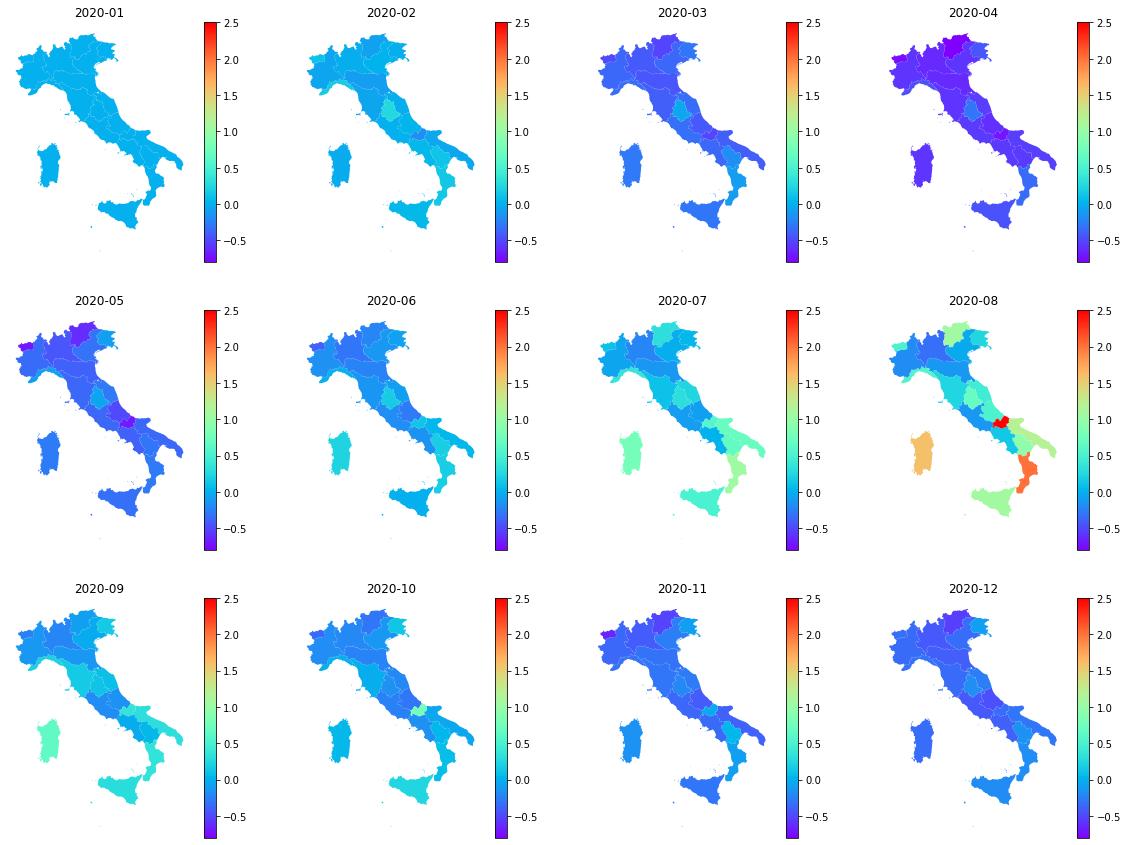

In [43]:
row_cnt = 3
col_cnt = 4
fig, axes = plt.subplots(3, 4, figsize=(20,15) )
vmin= groupped['intra_movement'].min()
vmax= groupped['intra_movement'].max()



dates = groupped.index.get_level_values("date").unique()

for idx, date in enumerate(dates):
    day_df = groupped.loc[date]
    axes[divmod(idx, col_cnt)].axis('off')

#     print(jan_data)
#     print(day_df)
    day_df['adjusted'] = (day_df['intra_movement'].to_list() - jan_data['intra_movement']) / jan_data['intra_movement']
    vmin= day_df['adjusted'].min()
    vmax= day_df['adjusted'].max()
#     print(re)
    re = gdf_county.set_index('GID_1').join(day_df, how='left')
    re.plot(column=re['adjusted'], 
            cmap='rainbow',  
            ax=axes[divmod(idx, col_cnt)], 
            legend=True, 
            vmin=-0.8,
            vmax=2.5,
                       
           )
    axes[divmod(idx, col_cnt)].set_title(date.strftime("%Y-%m"))
    
#     cbar = axes[divmod(idx, col_cnt)].collections[0].colorbar()
#     print(type(cbar))
#     cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

    
    print(vmin, vmax)
#     re.plot(ax=axes[divmod(idx, col_cnt)])
#     print(day_df)
#     re.plot(column=re['intra_movement'], cmap='PuBu',  ax=axes[divmod(idx, col_cnt)], legend=True, norm=mpl.colors.SymLogNorm(linthresh=0.3, linscale=0.3,
#                                               vmin=vmin, vmax=vmax))
    
# fig.colorbar(re['intra_movement'], ax=axes.ravel().tolist())
plt.show()

## index as places

In [44]:
groupped = df.groupby([pd.Grouper(freq='M'), 'place'] )['intra_movement'].sum().to_frame()
# groupped = groupped.reset_index('date')
groupped
places = groupped.index.get_level_values("place").unique()
places

Index(['ITA.10_1', 'ITA.11_1', 'ITA.12_1', 'ITA.13_1', 'ITA.14_1', 'ITA.15_1',
       'ITA.16_1', 'ITA.17_1', 'ITA.18_1', 'ITA.19_1', 'ITA.1_1', 'ITA.20_1',
       'ITA.2_1', 'ITA.3_1', 'ITA.4_1', 'ITA.5_1', 'ITA.6_1', 'ITA.7_1',
       'ITA.8_1', 'ITA.9_1'],
      dtype='object', name='place')

In [45]:
groupped = groupped.reorder_levels(['place', "date"])
groupped

,,intra_movement
place,date,
ITA.10_1,2020-01-31,13947
ITA.11_1,2020-01-31,1256
ITA.12_1,2020-01-31,61
ITA.13_1,2020-01-31,4053
ITA.14_1,2020-01-31,979
...,...,...
ITA.5_1,2020-12-31,2189
ITA.6_1,2020-12-31,2882
ITA.7_1,2020-12-31,916


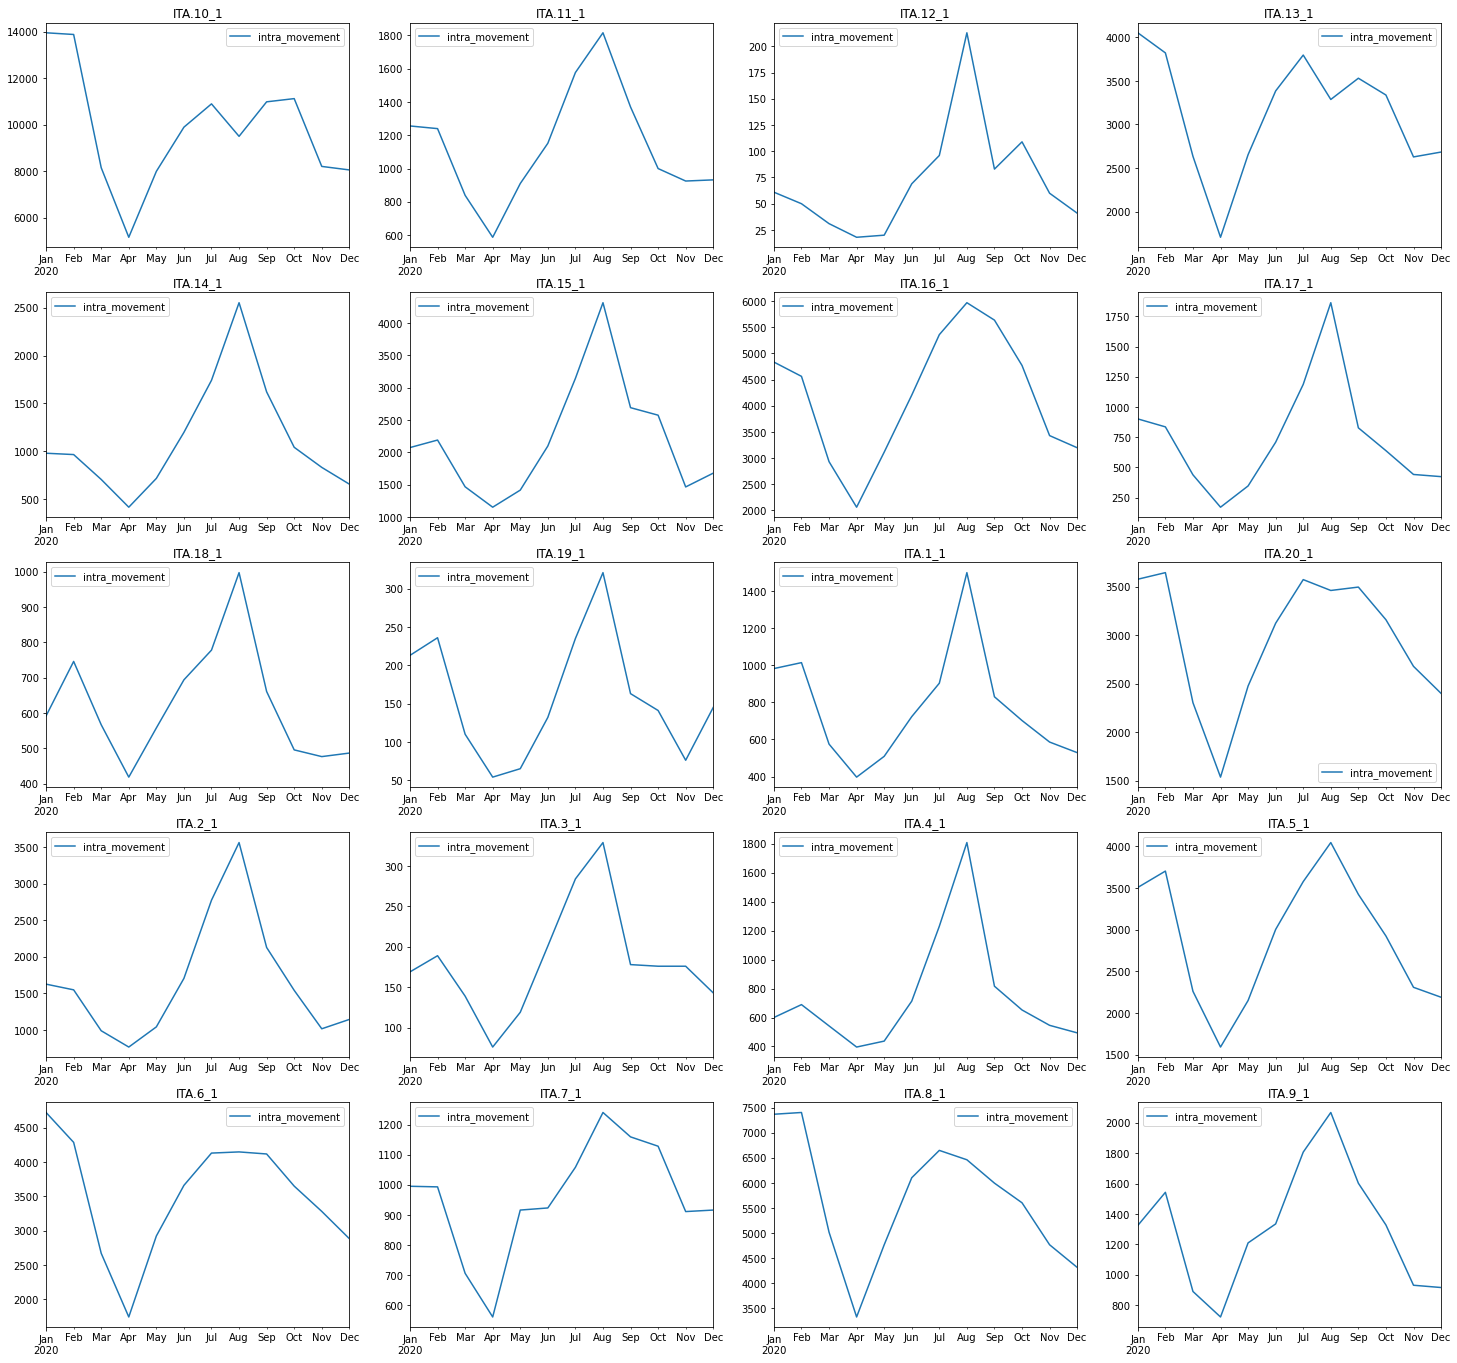

In [46]:
import math

row_cnt = math.ceil(math.sqrt(len(places)))
col_cnt = math.ceil(len(places)/row_cnt)
fig, axes = plt.subplots(row_cnt, col_cnt, figsize=(row_cnt * 5, col_cnt * 6) )
vmin= groupped['intra_movement'].min()
vmax= groupped['intra_movement'].max()

# jan_data = 

for idx, place in enumerate(places):
    day_df = groupped.loc[place]
#     re = gdf_county.set_index('GID_1').join(day_df, how='left')
    ax = day_df.plot(ax=axes[divmod(idx, col_cnt)], title = place)
    ax.set_xlabel("")
#     print(date)
#     re.plot(column=re['intra_movement'], cmap='PuBu',  ax=axes[divmod(idx, col_cnt)], legend=True, norm=mpl.colors.SymLogNorm(linthresh=0.3, linscale=0.3,
#                                               vmin=vmin, vmax=vmax))
    
# fig.colorbar(re['intra_movement'], ax=axes.ravel().tolist())
plt.show()

# Case study 2: Mobilities between G7 countries's and others 

This case investigate mobilities between G-7 countries and none-G-7. G7 countries are the largest 7 developed economies in the world: Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. . 

In [688]:
G7 = ['USA', 'GBR', "FRA", "ITA", "JPN", "CAN", "DEU"]

county_file = r'gz_2010_us_050_00_20m.json'
state_file = r'gz_2010_us_040_00_20m.json'
subdivision_file = r'gadm01_simplified/gadm36_1.shp'
country_file = r'gdam00_simplified/gadm36_00.shp'


gdf = gpd.read_file(country_file)
gdf['y'] = gdf.centroid.y
gdf['x'] = gdf.centroid.x
gdf

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # This is added back by InteractiveShellApp.init_path()


,GID_0,NAME_0,geometry,y,x
0,ABW,Aruba,"POLYGON ((-69.97820 12.46986, -70.02847 12.503...",12.509652,-69.970508
1,AFG,Afghanistan,"POLYGON ((68.52644 31.75435, 68.58202 31.75034...",33.828566,66.029628
2,AGO,Angola,"MULTIPOLYGON (((11.73347 -16.67255, 11.74014 -...",-12.297561,17.548715
3,AIA,Anguilla,"MULTIPOLYGON (((-63.42375 18.58903, -63.42403 ...",18.221736,-63.056916
4,ALA,Ã land,"MULTIPOLYGON (((21.32195 59.74986, 21.32472 59...",60.204199,20.147058
...,...,...,...,...,...
251,XSP,Spratly Islands,"MULTIPOLYGON (((114.35472 11.45139, 114.35167 ...",10.816933,114.508408
252,YEM,Yemen,"MULTIPOLYGON (((53.26931 12.12875, 53.28680 12...",15.904209,47.582688
253,ZAF,South Africa,"MULTIPOLYGON (((19.42097 -34.67903, 19.42208 -...",-28.996440,25.086365
254,ZMB,Zambia,"POLYGON ((25.88753 -17.98407, 25.86519 -17.975...",-13.462328,27.792294


In [646]:
df_countries = []
dict_counties = {}

for target_place in G7:
    params = {"operation": "get_flow_by_place",
              "source": "twitter",
        "scale": "world_country",
        "place": str(target_place),
       "begin": "01/01/2019",
       "end": "12/31/2019",
       "direction": "both"}

    q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
    r = requests.get(q, params=params)
    df = pd.read_csv(StringIO(r.text), header=None, names=['d_place', 'cnt'])
    dict_counties[target_place] = df

In [689]:
for target_place in G7:
    df_c = dict_counties[target_place]
    df_c["o_place"] = target_place
    df_c = df_c.set_index("o_place").join(gdf.set_index("GID_0"), how="left")
    df_c = df_c.drop(['NAME_0', "geometry"], axis=1)
    df_c = df_c.rename(columns={"y": "o_lat", 'x': "o_lon"})
    df_c['o_place'] = df_c.index
    df_c = df_c.set_index("d_place").join(gdf.set_index("GID_0"), how="left")
    df_c = df_c.drop(['NAME_0', "geometry"], axis=1)
    df_c = df_c.rename(columns={"y": "d_lat", 'x': "d_lon"})
    df_c['d_place'] = df_c.index
    df_c = df_c[df_c['d_place'] != df_c['o_place']]
    df_c = df_c[~df_c['d_place'].isin(G7)]
    dict_counties[target_place] = df_c
#     print(df_c)
#     print(df_c["o_place"])

In [690]:
kepler_cfg_file = r'kepler_cfg_G7.json'
kepler_cfg = json.load(open(kepler_cfg_file, 'r'))
map_2 = KeplerGl(height = 600)
map_2.config = kepler_cfg

for target_place in G7:
    map_2.add_data(data=dict_counties[target_place], name=target_place)


map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\GPU\AppData\Roaming\Python\Python37\site-packages\keplergl\keplergl.py:21: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  return df.to_dict('split')


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '7bpj7x6', 'type': …

In [691]:
cfg = map_2.config
with open('kepler_cfg_G7.json', 'w') as fp:
    json.dump(cfg, fp,  indent=2)

In [663]:
df_c.sort_values("cnt")

,cnt,o_lat,o_lon,o_place,d_lat,d_lon,d_place
d_place,,,,,,,
BTN,1,51.109649,10.394341,DEU,27.395859,90.428457,BTN
ASM,1,51.109649,10.394341,DEU,-14.236506,-170.324122,ASM
DJI,1,51.109649,10.394341,DEU,11.742248,42.571680,DJI
BRN,1,51.109649,10.394341,DEU,4.528088,114.755359,BRN
HTI,1,51.109649,10.394341,DEU,18.937778,-72.683681,HTI
...,...,...,...,...,...,...,...
USA,13858,51.109649,10.394341,DEU,45.675866,-112.471154,USA
AUT,14686,51.109649,10.394341,DEU,47.587935,14.143190,AUT
FRA,19677,51.109649,10.394341,DEU,46.558835,2.553253,FRA


In [656]:
df_c

,cnt,o_lat,o_lon,o_place,d_lat,d_lon,d_place
d_place,,,,,,,
SLV,19,51.109649,10.394341,DEU,13.730563,-88.867003,SLV
PYF,5,51.109649,10.394341,DEU,-15.678132,-145.337231,PYF
ESH,10,51.109649,10.394341,DEU,24.677812,-13.135041,ESH
LBN,63,51.109649,10.394341,DEU,33.919718,35.891895,LBN
PRK,3,51.109649,10.394341,DEU,40.134094,127.163059,PRK
...,...,...,...,...,...,...,...
JEY,10,51.109649,10.394341,DEU,49.213496,-2.131762,JEY
KAZ,178,51.109649,10.394341,DEU,48.157385,67.255176,KAZ
TKM,18,51.109649,10.394341,DEU,39.192684,59.179260,TKM


In [625]:
params = {"operation": "od_by_place",
       "odt_cube": "sg_od_2020_county",
        "place": str(target_FIPS),
       "begin": "01/01/2020",
       "end": "12/31/2020",
       "direction": "both"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)
df = pd.read_csv(StringIO(r.text))
df = df[df['o_place'] != df['d_place']]

# df['date'] = pd.to_datetime(df['date'])
# df = df.set_index('date')

# dfs = []
# gdf_counties = []

# for target_place in G7:
#     df_t = df[df['place'].str[:3] == target_place]
#     dfs.append(df_t)
    
#     geo = gdf[gdf['GID_1'].str[:3] == target_place]
#     gdf_counties.append(geo)
    
# df_G7 = pd.concat(dfs)
# print(df_G7)
# gdf_counties = gpd.concat(gdf_counties, axis=0)
# gdf_counties.plot(figsize=(20, 10))

KeyError: 'o_place'

In [606]:
df_countries = []
dict_counties = {}

for target_place in G7:
    params = {"operation": "get_flow_by_place",
              "source": "twitter",
        "scale": "world_country",
        "place": str(target_place),
       "begin": "01/01/2019",
       "end": "12/31/2019",
       "direction": "both"}

    q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
    r = requests.get(q, params=params)
    df = pd.read_csv(StringIO(r.text))
    dict_counties[target_place] = df


In [589]:
kepler_cfg_file = r'kepler_cfg.json'
kepler_cfg = json.load(open(kepler_cfg_file, 'r'))
map_2 = KeplerGl(height = 600)
# map_2.config = kepler_cfg

map_2.add_data(data=dict_counties["FRA"], name='G7')

 
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'G7': {'index': [13688, 7467, 16670, 5426, 7095, 5423, 7327, 4114, 15082, 18706, 17293, 5672, 2…

In [582]:
dict_counties["FRA"]

,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
87,FRA,KOR,283,47.842,2.772,36.936,127.298
105,FRA,ISR,275,47.930,2.791,31.595,34.953
109,FRA,ALB,40,47.694,3.255,41.148,20.002
231,FRA,GRC,667,47.864,3.059,37.633,23.971
269,FRA,AGO,12,48.174,2.202,-10.716,17.258
...,...,...,...,...,...,...,...
19758,CHN,FRA,231,33.486,111.788,48.141,2.834
19904,UZB,FRA,40,42.073,65.520,47.574,3.038
19985,BRA,FRA,2870,-20.712,-45.222,48.016,2.627
20268,LBY,FRA,49,27.640,17.522,47.502,2.941


# Case study: Find the most binded countries (not finished)

In [569]:
params = {"operation": "od_extract_data",
       "odt_cube": "twitter_od_2019_country",
       "begin": "01/01/2019" ,
       "end": "12/31/2019",
       "bbox": "-90,90,-180,180",
       "type": "aggregated"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)
df = pd.read_csv(StringIO(r.text))
df = df[df['o_place'] != df['d_place']]
df = df.sort_values("cnt")

df

,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
10226,LAO,MAC,1,16.607,104.905,22.118,113.551
9762,FJI,EGY,1,-18.142,178.442,30.049,31.244
9758,AFG,SYR,1,32.064,62.408,34.805,40.868
9757,COL,CPV,1,10.463,-75.505,16.737,-22.936
9752,HRV,SLV,1,43.043,16.093,13.669,-88.866
...,...,...,...,...,...,...,...
18787,USA,ESP,49583,36.871,-91.426,41.983,-0.010
6001,USA,MEX,51754,33.436,-103.775,25.400,-103.918
14210,USA,CAN,55383,40.196,-93.279,46.545,-91.064
2291,CAN,USA,58227,46.076,-90.924,40.406,-93.342


In [570]:
kepler_cfg_file = r'kepler_cfg.json'
kepler_cfg = json.load(open(kepler_cfg_file, 'r'))
map_2 = KeplerGl(height = 600)
# map_2.config = kepler_cfg

map_2.add_data(data=df, name='counties_flows')

map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'counties_flows': {'index': [10226, 9762, 9758, 9757, 9752, 9742, 9741, 9738, 9736, 9732, 9729,…

# Case study 3: Impact of Covid-19 on international travels to the Great Britain  in 2020

In this case, we are going to show the impact of Covid-19 on international travels to the Great Britain (GBR) in 2020. 

First, international flows involving GBR are extracted from ODT `twitter_od_2019_country` and ODT `twitter_od_2020_country`. Both `inflow` and `outflow` are extracted. These flows are aggregated into daily summations about 700 days. The results are smoothed using a 7-day period so the fluctuation between weekends and weekdays will be removed.

Second, we plot the daily flow numbers into two annual lines. Thus the trends of two years can be easily compared. 

## extract data

In [6]:
query_place = "GBR"  # Great Britain
rolling_width = 7  # width of smoothing window
years = [2019, 2020]
years = [str(y) for y in years]
dfs = [] # store the results into a list

for year in years:
    odt_cube = f'twitter_od_{year}_country'
    params = {"operation": "od_daily_movement_by_place",
           "odt_cube": odt_cube,
            "place": query_place,
           "direction": "both"}
    q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
    r = requests.get(q, params=params)
    df = pd.read_csv(StringIO(r.text), header=None, names=["date", "count"])
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')  
    df['month_day'] = df.index.strftime("%m-%d")    
    df['date'] = df.index
    df['year'] = df.index.year    
    dfs.append(df)
    
df = pd.concat(dfs, axis=0)
df['count'] = df['count'].rolling(rolling_width, min_periods=1).mean().astype(int) # smoothing
df

,count,month_day,date,year
date,,,,
2019-01-01,1256,01-01,2019-01-01,2019
2019-01-02,1166,01-02,2019-01-02,2019
2019-01-03,1160,01-03,2019-01-03,2019
2019-01-04,1129,01-04,2019-01-04,2019
2019-01-05,1113,01-05,2019-01-05,2019
...,...,...,...,...
2020-12-26,286,12-26,2020-12-26,2020
2020-12-27,270,12-27,2020-12-27,2020
2020-12-28,263,12-28,2020-12-28,2020


## plot data

Prepare data.

In [8]:
df_plot = []
for year in years:
    d = df.loc[str(year)].set_index("month_day")
    d[year] = d['count']
    d = d.drop(['count', "date", 'year'], axis=1)
    df_plot.append(d)
    
df_plot2 = pd.concat(df_plot, axis = 1)
df_plot2 = df_plot2.sort_index()
df_plot2

,2019,2020
month_day,,
01-01,1256.0,835.0
01-02,1166.0,886.0
01-03,1160.0,909.0
01-04,1129.0,921.0
01-05,1113.0,933.0
...,...,...
12-26,815.0,286.0
12-27,802.0,270.0
12-28,791.0,263.0


Plot data. We can see a dramtical drop of international travel since the beginning of March in 2020. There are some gaps due to the lack of data.

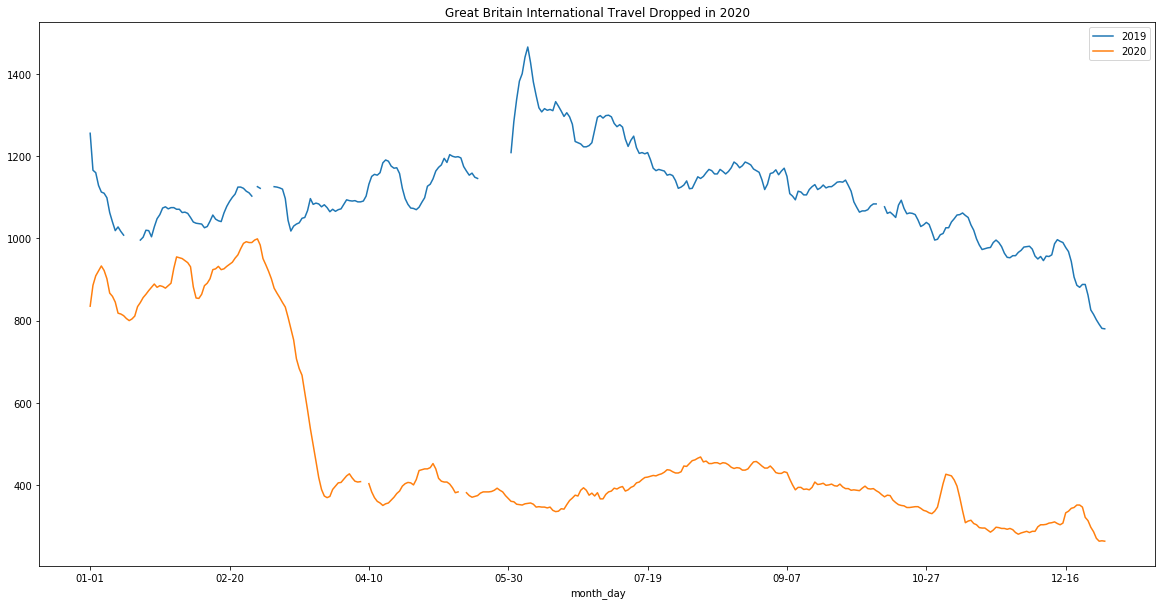

In [12]:
df_plot2.plot(y=years,figsize=(20,10), title="Great Britain International Travel Dropped in 2020")

# Case Study 4: Chicago's top-20 connected out-state counties in 2019.

In this case, we investigate the top-20 counties has the most connection with Chicago. Connection refers to the number of flows between to places. Flows involved in Chicago (both inflow and outflow) are derived from SafeGraph data, then are aggreated into county-level. Finally, the top-20 counties having flows with Chicago are extracted.

We also show how to map results from ODT Explorer using Keplergl.

## extract data

Grab data from SafeGraph country OD cude of 2019. It may take 2 minutes.

In [2]:
target_FIPS = "17031"  # Cook County in Chicago

params = {"operation": "od_extract_data",
       "odt_cube": "sg_od_2019_county",
       "begin": "01/01/2019" ,
       "end": "12/31/2019",
       "bbox": "-90,90,-180,180",
       "type": "aggregated"}

print("Fetching data...")
q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

df = pd.read_csv(StringIO(r.text))
df = df[df['d_place'] != df['o_place']]


df['o_place'] = df['o_place'].astype(str).str.zfill(5)
df['d_place'] = df['d_place'].astype(str).str.zfill(5)

df = df[df['d_place'] == target_FIPS]
print("Number of records:", len(df))
df.head()

Fetching data...
Number of records: 3209


,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
966,20057,17031,1550,37.757,-100.013,41.877,-87.727
2200,29023,17031,6760,36.749,-90.422,41.862,-87.718
10010,17011,17031,16447,41.380,-89.410,41.871,-87.766
12122,12045,17031,150,29.825,-85.290,41.894,-87.765
12822,42025,17031,728,40.877,-75.700,41.893,-87.791


In [4]:
top_count = 20
df_tops = df[df['o_place'].str[:2] != str(target_FIPS)[:2]]
df_tops = df_tops.sort_values('cnt',ascending = False).head(top_count)

df_tops

,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
555626,18089,17031,2436789,41.537,-87.428,41.733,-87.667
2170961,55079,17031,398701,43.036,-87.955,41.901,-87.762
4642228,29189,17031,395589,38.650,-90.404,41.882,-87.726
2719280,18097,17031,377216,39.797,-86.141,41.853,-87.715
895345,18127,17031,326769,41.521,-87.111,41.798,-87.697
2749644,06037,17031,296647,34.064,-118.304,41.904,-87.738
2456935,26163,17031,219050,42.338,-83.228,41.866,-87.718
3643245,27053,17031,215603,44.974,-93.351,41.887,-87.734
5069417,26125,17031,202811,42.575,-83.309,41.896,-87.719
5815186,04013,17031,191672,33.503,-111.996,41.904,-87.771


## show map

In [5]:
from keplergl import KeplerGl
import json

county_file = r'gz_2010_us_050_00_20m.json'
state_file = r'gz_2010_us_040_00_20m.json'

o_places = df_tops['o_place'].to_list()

county_gdf = geopandas.read_file(county_file)
state_gdf = geopandas.read_file(state_file)
state_gdf = state_gdf.set_index("STATE")
state_gdf = state_gdf.drop(['GEO_ID', 'LSAD', 'CENSUSAREA', 'geometry'], axis=1)

county_gdf['place'] = county_gdf['GEO_ID'].str[-5:]
county_tops = county_gdf[county_gdf['place'].isin(o_places)]
origin_place = county_gdf[county_gdf['place'] == str(target_FIPS)]


results = df_tops.set_index("o_place").join(county_gdf.set_index('place'))
series = [results['NAME'], results['cnt']]
results = pd.concat(series, axis=1)

results['STATE_CODE'] = results.index
results['STATE_CODE'] = results['STATE_CODE'].str[:2]
results = results.set_index('STATE_CODE').join(state_gdf, how="left", rsuffix="_STATE")
results = results.sort_values("cnt", ascending=False)  
results['Rank'] = results.reset_index().index + 1
results["County"] = results["NAME"] + ", " + results["NAME_STATE"]
# results = results.reset_index().drop(['index', 'NAME', 'NAME_STATE'], axis=1)
results = results[['County', 'cnt', 'Rank']]
print(results)

kepler_cfg_file = r'kepler_cfg.json'
kepler_cfg = json.load(open(kepler_cfg_file, 'r'))
map_2 = KeplerGl(height = 600)
map_2.config = kepler_cfg

map_2.add_data(data=county_tops, name='counties_geometry')
map_2.add_data(data=df_tops, name='df_tops')
map_2.add_data(data=origin_place, name='origin place')
 
map_2

                     County      cnt  Rank
18            Lake, Indiana  2436789     1
55     Milwaukee, Wisconsin   398701     2
29      St. Louis, Missouri   395589     3
18          Marion, Indiana   377216     4
18          Porter, Indiana   326769     5
06  Los Angeles, California   296647     6
26          Wayne, Michigan   219050     7
27      Hennepin, Minnesota   215603     8
26        Oakland, Michigan   202811     9
04        Maricopa, Arizona   191672    10
55       Kenosha, Wisconsin   190833    11
55          Dane, Wisconsin   181412    12
29        Jackson, Missouri   177470    13
48            Harris, Texas   171144    14
55      Waukesha, Wisconsin   168124    15
18      Tippecanoe, Indiana   165172    16
21      Jefferson, Kentucky   159054    17
20          Johnson, Kansas   154310    18
18      St. Joseph, Indiana   147614    19
48            Dallas, Texas   142717    20
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ou6ayf5', 'type': …

If needed, saved the config file of keplergl widget.

In [22]:
cfg = map_2.config
with open('kepler_cfg.json', 'w') as fp:
    json.dump(cfg, fp,  indent=2)

In [15]:
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [ ]:
def get_Subdivition_flows_by_country(country_code, params):
    country_code = str(country_code)
    max_subs = 85
    subs = [f"{country_code}.{i + 1}_1" for i in range(max_subs)]
    dfs = []
    attemp_max = 3
    attemp_cnt = 0

    for sub in subs:
        params['place'] = sub
        
        df = request_flows(params)
#         print(df)

        print(f"obtaining {len(df)} record from {sub}.")
        dfs.append(df)
        if len(df) < 1:
            attemp_cnt += 1
        if attemp_cnt > attemp_max:
            break
        
        
    df = pd.concat(dfs, axis = 0)
    return df


def request_flows(params):

#     print(r.text)
    return df